In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [63]:
invoice_test = pd.read_csv('/home/karen/Documents/Datasets/Fraud Detection in Electricity and Gas Consumption/test data/invoice_test.csv', low_memory=False)
client_test = pd.read_csv('/home/karen/Documents/Datasets/Fraud Detection in Electricity and Gas Consumption/test data/client_test.csv', low_memory=False)
invoice_train = pd.read_csv('/home/karen/Documents/Datasets/Fraud Detection in Electricity and Gas Consumption/train data/invoice_train.csv', low_memory=False)
client_train = pd.read_csv('/home/karen/Documents/Datasets/Fraud Detection in Electricity and Gas Consumption/train data/client_train.csv', low_memory=False)


In [64]:
print(invoice_train.shape, invoice_test.shape, client_train.shape, client_test.shape)

(4476749, 16) (1939730, 16) (135493, 6) (58069, 5)


In [65]:
client_train

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0


In [66]:
invoice_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


In [67]:
client_test

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977
...,...,...,...,...,...
58064,63,test_Client_9995,11,399,17/03/2010
58065,63,test_Client_9996,11,311,28/05/2011
58066,60,test_Client_9997,11,101,04/03/1978
58067,60,test_Client_9998,11,101,23/02/2018


In [68]:
invoice_test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC


In [69]:
invoice_train.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [70]:
client_train.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [71]:
invoice_train.sample()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
2910488,train_Client_57433,2016-02-02,40,220522,0,5,8,1,174,0,0,0,2676,2850,4,GAZ


In [72]:
client_train.sample()

,disrict,client_id,client_catg,region,creation_date,target
78475,62,train_Client_48682,11,301,13/04/2019,0.0


In [73]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [74]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [75]:
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [76]:
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


<function matplotlib.pyplot.show(close=None, block=None)>

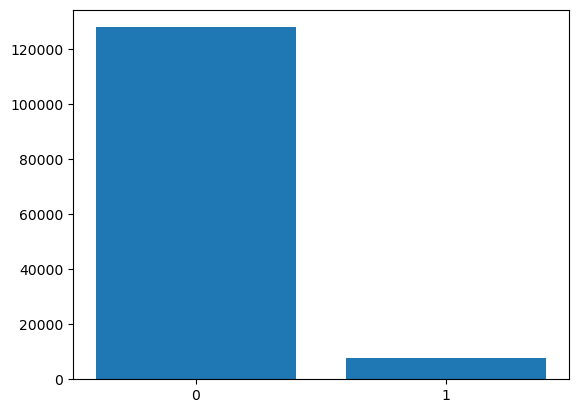

In [77]:
fraud_activities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraud_activities.index, height=fraud_activities.values, tick_label=[0,1])
plt.show

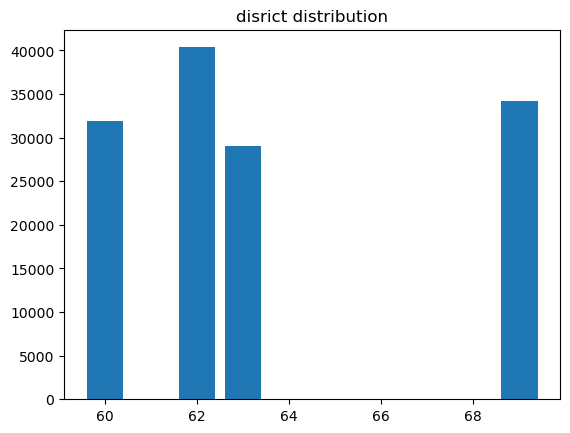

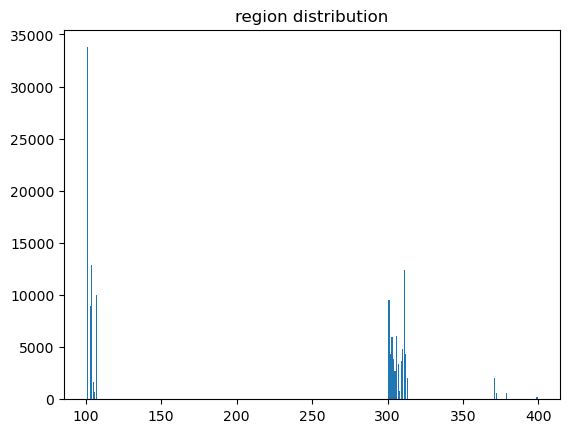

In [78]:
for col in ['disrict','region']:
    region = client_train.groupby([col])['client_id'].count()
    plt.bar(x=region.index, height=region.values)
    plt.title(col+' distribution')
    plt.show()

### Feauture Enginering

In [79]:
for df in [invoice_train, invoice_test]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])
invoice_train.dtypes

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [80]:
d={"ELEC":0,"GAZ":1}
invoice_train['counter_type']=invoice_train['counter_type'].map(d)
invoice_test['counter_type']=invoice_test['counter_type'].map(d)

In [81]:
invoice_train['counter_type']

0          0
1          0
2          0
3          0
4          0
          ..
4476744    0
4476745    0
4476746    0
4476747    0
4476748    0
Name: counter_type, Length: 4476749, dtype: int64

In [82]:
invoice_train['counter_type'].value_counts()

0    3079406
1    1397343
Name: counter_type, dtype: int64

In [83]:
client_train['client_catg'] = client_train['client_catg'].astype('object')
client_train['disrict'] = client_train['disrict'].astype('object')

client_test['client_catg'] = client_test['client_catg'].astype('object')
client_test['disrict'] = client_test['disrict'].astype('object')

In [84]:
aggs = {}
aggs['consommation_level_1'] = ['mean']
aggs['consommation_level_2'] = ['mean']
aggs['consommation_level_3'] = ['mean']
aggs['consommation_level_4'] = ['mean']
agg_trans = invoice_train.groupby(['client_id']).agg(aggs)

In [85]:
agg_trans

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
,mean,mean,mean,mean
client_id,,,,
train_Client_0,352.400000,10.571429,0.000000,0.000000
train_Client_1,557.540541,0.000000,0.000000,0.000000
train_Client_10,798.611111,37.888889,0.000000,0.000000
train_Client_100,1.200000,0.000000,0.000000,0.000000
train_Client_1000,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...
train_Client_99995,1.957746,0.000000,0.000000,0.000000
train_Client_99996,185.853659,0.756098,0.000000,0.000000


In [86]:
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)
df = (invoice_train.groupby('client_id')
      .size()
      .reset_index(name='{}transactions_count'.format('1')))
agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')
agg_trans

,client_id,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,train_Client_0,35,352.400000,10.571429,0.000000,0.000000
1,train_Client_1,37,557.540541,0.000000,0.000000,0.000000
2,train_Client_10,18,798.611111,37.888889,0.000000,0.000000
3,train_Client_100,20,1.200000,0.000000,0.000000,0.000000
4,train_Client_1000,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...
135488,train_Client_99995,71,1.957746,0.000000,0.000000,0.000000
135489,train_Client_99996,41,185.853659,0.756098,0.000000,0.000000
135490,train_Client_99997,36,273.083333,0.000000,0.000000,0.000000
135491,train_Client_99998,2,300.000000,70.500000,0.000000,0.000000


In [87]:
train = pd.merge(client_train,agg_trans, on='client_id', how='left')

In [88]:
train

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,train_Client_1,11,107,29/05/2002,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,train_Client_100,11,105,11/07/1996,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0,71,1.957746,0.000000,0.000000,0.000000
135489,63,train_Client_99996,11,311,25/10/2012,0.0,41,185.853659,0.756098,0.000000,0.000000
135490,63,train_Client_99997,11,311,22/11/2011,0.0,36,273.083333,0.000000,0.000000,0.000000
135491,60,train_Client_99998,11,101,22/12/1993,0.0,2,300.000000,70.500000,0.000000,0.000000


In [89]:
agg_test = invoice_test.groupby(['client_id']).agg(aggs)

In [90]:
agg_test.columns = ['_'.join(col).strip() for col in agg_test.columns.values]
agg_test.reset_index(inplace=True)
df = (invoice_test.groupby('client_id')
      .size()
      .reset_index(name='{}transactions_count'.format('1')))
agg_test = pd.merge(df, agg_test, on='client_id', how='left')
agg_test

,client_id,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,test_Client_0,37,488.135135,3.243243,0.000000,0.000000
1,test_Client_1,22,1091.409091,843.136364,182.318182,586.318182
2,test_Client_10,74,554.040541,37.364865,15.743243,0.162162
3,test_Client_100,40,244.350000,0.000000,0.000000,0.000000
4,test_Client_1000,53,568.188679,145.056604,33.679245,0.000000
...,...,...,...,...,...,...
58064,test_Client_9995,4,461.250000,0.000000,0.000000,0.000000
58065,test_Client_9996,46,181.565217,0.000000,0.000000,0.000000
58066,test_Client_9997,59,160.559322,11.932203,0.000000,0.000000
58067,test_Client_9998,1,800.000000,400.000000,727.000000,0.000000


In [91]:
test = pd.merge(client_test,agg_test, on='client_id', how='left')

In [92]:
train.shape, test.shape

((135493, 11), (58069, 10))

In [93]:
# drop_columns = ['client_id', 'creation_date']
# for col in drop_columns:
#     if col in train.columns:
#         train.drop([col], axis=1, inplace=True)
#     if col in test.columns:
#         test.drop([col], axis=1, inplace=True)

In [94]:
train.info()

# X = train.drop('target', axis=1, inplace=True)
# y = train['target']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  object 
 1   client_id                  135493 non-null  object 
 2   client_catg                135493 non-null  object 
 3   region                     135493 non-null  int64  
 4   creation_date              135493 non-null  object 
 5   target                     135493 non-null  float64
 6   1transactions_count        135493 non-null  int64  
 7   consommation_level_1_mean  135493 non-null  float64
 8   consommation_level_2_mean  135493 non-null  float64
 9   consommation_level_3_mean  135493 non-null  float64
 10  consommation_level_4_mean  135493 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.4+ MB


In [95]:
# train.drop('client_id', axis=1, inplace=True)
# train.drop('creation_date', axis=1, inplace=True)

# test.drop('client_id', axis=1, inplace=True)
# test.drop('creation_date', axis=1, inplace=True)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  object 
 1   client_id                  135493 non-null  object 
 2   client_catg                135493 non-null  object 
 3   region                     135493 non-null  int64  
 4   creation_date              135493 non-null  object 
 5   target                     135493 non-null  float64
 6   1transactions_count        135493 non-null  int64  
 7   consommation_level_1_mean  135493 non-null  float64
 8   consommation_level_2_mean  135493 non-null  float64
 9   consommation_level_3_mean  135493 non-null  float64
 10  consommation_level_4_mean  135493 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.4+ MB


In [97]:
train.shape

# X = train.drop('target', axis=1, inplace=True)
# y = train['target']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(135493, 11)

In [98]:
test.shape

(58069, 10)

In [99]:
train.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', '1transactions_count', 'consommation_level_1_mean',
       'consommation_level_2_mean', 'consommation_level_3_mean',
       'consommation_level_4_mean'],
      dtype='object')

In [100]:
train.drop('creation_date', axis=1, inplace=True)

In [101]:
train.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'target',
       '1transactions_count', 'consommation_level_1_mean',
       'consommation_level_2_mean', 'consommation_level_3_mean',
       'consommation_level_4_mean'],
      dtype='object')

In [102]:
train.drop('client_id', axis=1, inplace=True)

In [103]:
train.columns

Index(['disrict', 'client_catg', 'region', 'target', '1transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean'],
      dtype='object')

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  object 
 1   client_catg                135493 non-null  object 
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        135493 non-null  int64  
 5   consommation_level_1_mean  135493 non-null  float64
 6   consommation_level_2_mean  135493 non-null  float64
 7   consommation_level_3_mean  135493 non-null  float64
 8   consommation_level_4_mean  135493 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 10.3+ MB


In [105]:
y = train['target']

In [106]:
X = train.drop(['target'], axis=1)

In [107]:
X

,disrict,client_catg,region,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,11,101,35,352.400000,10.571429,0.000000,0.000000
1,69,11,107,37,557.540541,0.000000,0.000000,0.000000
2,62,11,301,18,798.611111,37.888889,0.000000,0.000000
3,69,11,105,20,1.200000,0.000000,0.000000,0.000000
4,62,11,303,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...
135488,62,11,304,71,1.957746,0.000000,0.000000,0.000000
135489,63,11,311,41,185.853659,0.756098,0.000000,0.000000
135490,63,11,311,36,273.083333,0.000000,0.000000,0.000000
135491,60,11,101,2,300.000000,70.500000,0.000000,0.000000


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [109]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [110]:
y_pred = clf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9419535776227905

In [112]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.5007241076762902

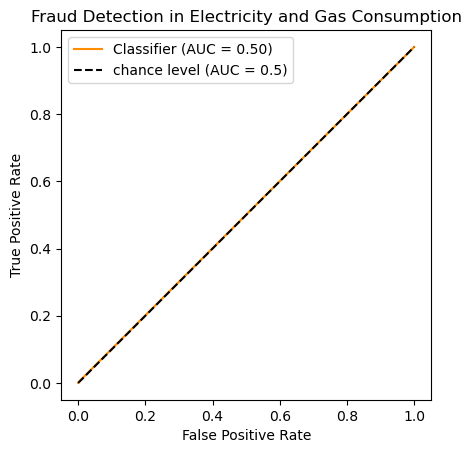

In [113]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred.ravel(),
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fraud Detection in Electricity and Gas Consumption")
plt.legend()
plt.show()

In [114]:
test.drop('client_id', axis=1, inplace=True)
test.drop('creation_date', axis=1, inplace=True)

In [115]:
test

,disrict,client_catg,region,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,62,11,307,37,488.135135,3.243243,0.000000,0.000000
1,69,11,103,22,1091.409091,843.136364,182.318182,586.318182
2,62,11,310,74,554.040541,37.364865,15.743243,0.162162
3,60,11,101,40,244.350000,0.000000,0.000000,0.000000
4,62,11,301,53,568.188679,145.056604,33.679245,0.000000
...,...,...,...,...,...,...,...,...
58064,63,11,399,4,461.250000,0.000000,0.000000,0.000000
58065,63,11,311,46,181.565217,0.000000,0.000000,0.000000
58066,60,11,101,59,160.559322,11.932203,0.000000,0.000000
58067,60,11,101,1,800.000000,400.000000,727.000000,0.000000


In [116]:
test_pred = clf.predict(test)

In [117]:
test_pred

array([0., 0., 0., ..., 0., 0., 0.])